In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
!pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:02<00:00, 44.2MB/s]
100% 2.29G/2.29G [01:02<00:00, 39.5MB/s]


In [7]:
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [8]:
data_dir = ('chest_xray/chest_xray/train')
val_dir = ('chest_xray/val')
test_dir = ('chest_xray/chest_xray/test')
print(data_dir)
print(val_dir)

chest_xray/chest_xray/train
chest_xray/val


In [9]:
classes = os.listdir(data_dir)
classes

['PNEUMONIA', '.DS_Store', 'NORMAL']

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [11]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2, dtype= float)

In [12]:
train = gen.flow_from_directory(data_dir,
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 4173 images belonging to 2 classes.


In [27]:
val = gen.flow_from_directory(test_dir,
                               target_size = (150,150),
                               batch_size = 1,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")


Found 124 images belonging to 2 classes.


In [28]:
classes = val.class_indices

In [29]:
classes

{'NORMAL': 0, 'PNEUMONIA': 1}

Text(0.5, 1.0, 'Healthy')

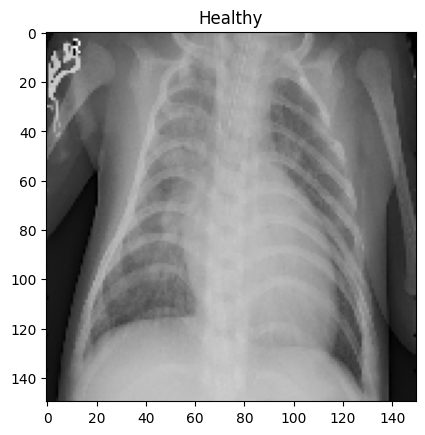

In [30]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

tit = 'Brain_Tumor'
if batch[1][0] == 1:
    tit = 'Healthy'
plt.title(tit)

Text(0.5, 1.0, 'Healthy')

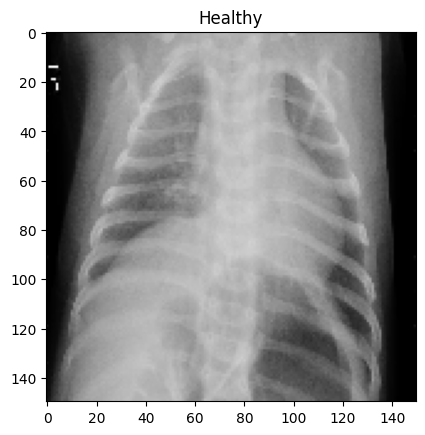

In [31]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

tit = 'Brain_Tumor'
if batch[1][0] == 1:
    tit = 'Healthy'
plt.title(tit)

In [32]:
batch[0][0]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.05882353, 0.05882353, 0.05882353],
        [0.06666667, 0.06666667, 0.06666667],
        [0.16078432, 0

In [33]:
batch

(array([[[[0.00784314, 0.00784314, 0.00784314],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01176471, 0.01176471, 0.01176471],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01176471, 0.01176471, 0.01176471],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.01568628, 0.01568628, 0.01568628],
          [0.01176471, 0.01176471, 0.01176471],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.05882353, 0.05882353, 0.05882353],
          [0.06666

In [34]:
batch[0][0].shape

(150, 150, 3)

In [35]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [36]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 34, 34, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 18496)             0         
                                                                 
 dense_2 (Dense)             (None, 80)               

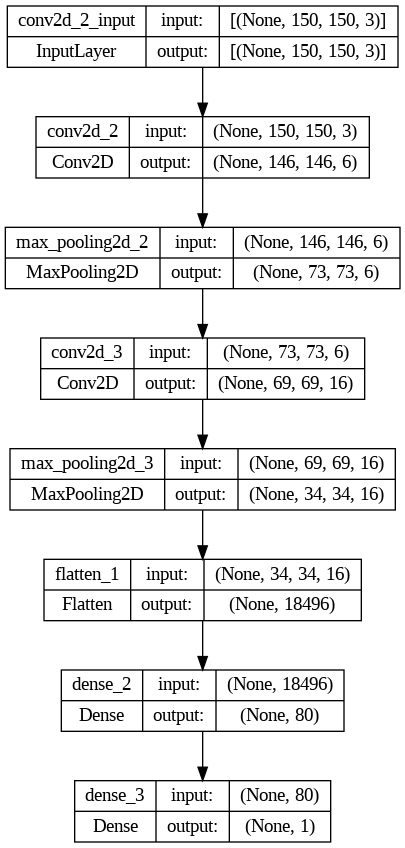

In [39]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [40]:
histroy1 = model.fit(train, epochs=5, verbose=1, validation_data=(val))

Epoch 1/5
17/17 [==============================] - 41s 2s/step - loss: 0.6985 - accuracy: 0.6676 - val_loss: 0.6714 - val_accuracy: 0.6290
Epoch 2/5
17/17 [==============================] - 40s 2s/step - loss: 0.3316 - accuracy: 0.8454 - val_loss: 0.3033 - val_accuracy: 0.8468
Epoch 3/5
17/17 [==============================] - 40s 2s/step - loss: 0.1433 - accuracy: 0.9485 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 4/5
17/17 [==============================] - 48s 3s/step - loss: 0.1041 - accuracy: 0.9621 - val_loss: 1.0581 - val_accuracy: 0.6613
Epoch 5/5
17/17 [==============================] - 42s 3s/step - loss: 0.0923 - accuracy: 0.9629 - val_loss: 0.5705 - val_accuracy: 0.7581


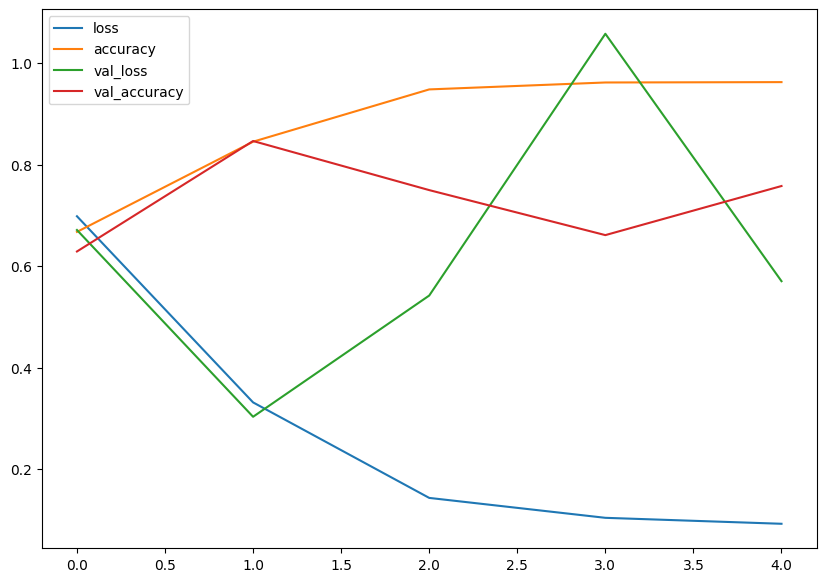

In [41]:
import pandas as pd
pd.DataFrame(histroy1.history).plot(figsize=(10, 7));

In [42]:
def prediction(img):
    predictions = model.predict(img)
    pred = predictions[0][0]

    if pred > 0.5:
        predicted_class = list(classes.keys())[list(classes.values()).index(0)]
    else:
        predicted_class = list(classes.keys())[list(classes.values()).index(1)]

    plt.imshow(img[0])
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    return predicted_class

1/1 [==============================] - 0s 169ms/step


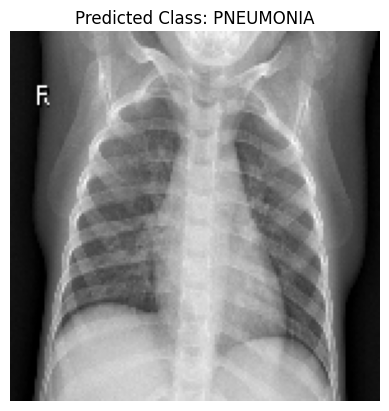

'PNEUMONIA'

In [43]:
pred_img = next(val)[0]

prediction(pred_img)

1/1 [==============================] - 0s 28ms/step


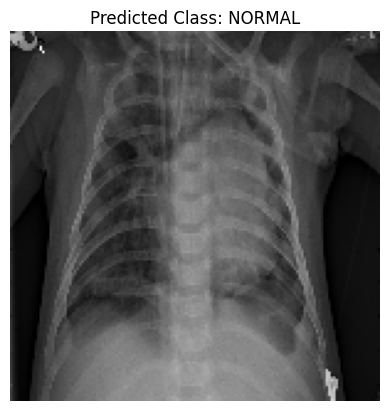

'NORMAL'

In [44]:
pred_img = next(val)[0]

prediction(pred_img)

In [45]:
model.save('Updated_ChestXray.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
from tensorflow.keras.models import load_model

model = load_model('Updated_ChestXray.h5')

In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/Screenshot from 2024-07-04 13-06-23.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Rescale as you did during training

# Predict the class
prediction = model.predict(img_array)

# Output the prediction
if prediction[0] > 0.5:
    print("Class 1")
else:
    print("Class 0")


1/1 [==============================] - 0s 112ms/step
Class 0
